# 🚀 SAIR PyTorch Mastery - Lecture 1: From NumPy to Production Neural Networks

**Course:** Ultimate Applied Deep Learning with PyTorch  
**Module:** PyTorch Foundations  
**Instructor:** Mohammed Awad Ahmed (Silva)  
**SAIR Community:** Building Sudan's AI Future 🇸🇩

## 📘 How to Use This Notebook

This is a **standalone, self-teaching lecture notebook** . Here's how to get the most from it:

**How to Study:**
1. **Read all markdown cells carefully** - they contain explanations, mental models, and reasoning
2. **Run code cells sequentially** - don't skip ahead as each builds on the previous
3. **Pause at "Stop & Think" prompts** - make predictions before running the next cell
4. **Experiment with the code** - change parameters and see what happens

**Time Commitment:** ~2-3 hours for complete understanding

**Learning Outcomes:** After completing this notebook, you will be able to:
1. Create and manipulate PyTorch tensors
2. Understand automatic differentiation (autograd)
3. Build neural networks using `nn.Module`
4. Implement complete training loops
5. Write device-agnostic code (CPU/GPU)
6. Save and load trained models

**This Notebook Replaces a Lecture By:**
- Breaking complex concepts into progressive steps
- Providing explanations before each code cell
- Including mental models and analogies
- Offering built-in reflection points

## 🎯 Why This Lecture Matters

You've mastered machine learning foundations with NumPy and built neural networks from scratch. Now, we take the **next evolutionary step** into industrial-grade deep learning.

> "PyTorch isn't just another library—it's the engine that powers modern AI research and production systems worldwide."

**Key Insight**: Everything you learned in previous courses is STILL APPLICABLE. PyTorch automates the manual work you did, letting you focus on architecture and innovation.

---

### 🎯 By the end of this lecture, you will be able to:

**Fundamentals:** 

1. ✅ Create and manipulate PyTorch tensors (like NumPy but better)
2. ✅ Understand automatic differentiation (autograd) 
3. ✅ Build neural networks using `nn.Module`

**Training:**

4. ✅ Implement a complete training loop
5. ✅ Use optimizers and loss functions
6. ✅ Move models between CPU and GPU

**Professional Skills:**

7. ✅ Debug common PyTorch errors
8. ✅ Save and load trained models
9. ✅ Apply PyTorch to a real-world dataset

---

### 📋 PREREQUISITES CHECK

Before starting, make sure you're comfortable with:

**From Course 3 (NumPy Neural Networks):**
- Matrix multiplication (`@` operator)
- Forward/backward propagation
- Gradient descent optimization

**Python Fundamentals:**
- Object-oriented programming (classes, inheritance)
- Functions and loops
- Basic debugging skills

**If you need a refresher:**
- Review Course 3 notebooks on neural networks
- Practice NumPy array operations

In [8]:
import torch
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA version: {torch.version.cuda}")
    print(f"GPU: {torch.cuda.get_device_name(0)}")

PyTorch version: 2.9.0+cu126
CUDA available: True
CUDA version: 12.6
GPU: Tesla T4


# PART 1: Getting Started with PyTorch Tensors

Let's start with the most fundamental building block: **Tensors**. In PyTorch, a tensor is a multi-dimensional array - very similar to NumPy arrays, but with superpowers.

### Creating Your First Tensor

The `torch.tensor()` function creates tensors from Python lists, just like `np.array()` in NumPy. Notice how similar this feels to what you already know.

In [9]:
# Create a tensor (like NumPy array)
x = torch.tensor([1.0, 2.0, 3.0])
print(f"Tensor x: {x}")
print(f"Shape: {x.shape}")
print(f"Data type: {x.dtype}")

Tensor x: tensor([1., 2., 3.])
Shape: torch.Size([3])
Data type: torch.float32


### Basic Tensor Operations

PyTorch supports all the familiar NumPy operations. The syntax is intentionally similar to make your transition smooth.

In [10]:
# Basic operations (familiar from NumPy)
y = x * 2 + 1
print(f"\ny = x * 2 + 1: {y}")


y = x * 2 + 1: tensor([3., 5., 7.])


### Seamless NumPy Integration

PyTorch can convert to and from NumPy arrays seamlessly. This is powerful because you can use NumPy for data preprocessing and PyTorch for neural networks.

In [11]:
# Convert between NumPy and PyTorch
x_numpy = x.numpy()  # PyTorch → NumPy
x_torch = torch.from_numpy(x_numpy)  # NumPy → PyTorch
print(f"\nConverted to NumPy: {x_numpy}")
print(f"Converted back to PyTorch: {x_torch}")


Converted to NumPy: [1. 2. 3.]
Converted back to PyTorch: tensor([1., 2., 3.])


In [12]:
print("\n✅ You've just used PyTorch! See how similar it is to NumPy?")


✅ You've just used PyTorch! See how similar it is to NumPy?


## 🧠 Mental Model: PyTorch Tensors

Think of PyTorch tensors as **"NumPy arrays with superpowers":**

1. **Memory Layout:** Same as NumPy (contiguous in memory)
2. **Operations:** Same syntax as NumPy (+, *, @, etc.)
3. **Superpower 1:** Automatic gradient tracking (`requires_grad=True`)
4. **Superpower 2:** GPU acceleration (`.cuda()` or `.to('cuda')`)

The key insight: You already know 90% of PyTorch tensor operations because they're identical to NumPy!

## ⚡ Why PyTorch? The Game-Changing Features

Let's see what makes PyTorch special beyond just being "NumPy with gradients." We'll compare performance with a real example.

In [13]:
# ============================================================
# ⚡ WHY PYTORCH? A QUICK DEMONSTRATION
# ============================================================
import numpy as np 
import time

print("="*60)
print("IMMEDIATE VALUE: Why PyTorch is Game-Changing")
print("="*60)

IMMEDIATE VALUE: Why PyTorch is Game-Changing


### Setting Up the Comparison

We'll create large matrices for multiplication. This is a common operation in neural networks (forward pass through linear layers).

In [14]:
# Large matrix multiplication
size = 5000
a_numpy = np.random.randn(size, size)
b_numpy = np.random.randn(size, size)

# Convert to PyTorch for fair comparison
a_torch = torch.from_numpy(a_numpy)
b_torch = torch.from_numpy(b_numpy)

### 🛑 Stop & Think

Before running the next cell, consider:
1. How long do you think a 2000×2000 matrix multiplication will take on CPU?
2. If GPU is available, what speedup do you expect?
3. Why would matrix multiplication be faster on GPU?

In [15]:
# NumPy (CPU only)
start = time.time()
c_numpy = a_numpy @ b_numpy
numpy_time = time.time() - start

# PyTorch (CPU)
start = time.time()
c_torch = a_torch @ b_torch
torch_cpu_time = time.time() - start

### GPU Acceleration (If Available)

If you have a compatible NVIDIA GPU, PyTorch can leverage it automatically. The `.cuda()` method moves tensors to GPU memory.

In [16]:
# PyTorch (GPU - if available)
if torch.cuda.is_available():
    a_gpu = a_torch.cuda()
    b_gpu = b_torch.cuda()
    
    start = time.time()
    c_gpu = a_gpu @ b_gpu
    torch.cuda.synchronize()  # Wait for GPU to finish
    torch_gpu_time = time.time() - start

In [17]:
print(f"\nMatrix Multiplication {size}×{size}:")
print(f"NumPy (CPU):        {numpy_time:.4f} seconds")
print(f"PyTorch (CPU):      {torch_cpu_time:.4f} seconds")
if torch.cuda.is_available():
    print(f"PyTorch (GPU):      {torch_gpu_time:.4f} seconds")
    print(f"\n🚀 GPU Speedup: {numpy_time/torch_gpu_time:.1f}x faster!")

print("\n🎯 PyTorch gives you:")
print("• Similar syntax to NumPy (easy to learn)")
print("• Automatic gradients (no more manual backprop)")
print("• GPU acceleration (100x speedups / for high scale)")
print("• Production-ready features")


Matrix Multiplication 5000×5000:
NumPy (CPU):        7.2321 seconds
PyTorch (CPU):      6.1348 seconds
PyTorch (GPU):      1.2940 seconds

🚀 GPU Speedup: 5.6x faster!

🎯 PyTorch gives you:
• Similar syntax to NumPy (easy to learn)
• Automatic gradients (no more manual backprop)
• GPU acceleration (100x speedups / for high scale)
• Production-ready features


## 🤔 Bridging the Mental Gap

Now let's connect what you already know (NumPy neural networks) to how PyTorch thinks about the same problems.

In [18]:
print("="*60)
print("BRIDGING THE MENTAL GAP: NumPy vs PyTorch Thinking")
print("="*60)

BRIDGING THE MENTAL GAP: NumPy vs PyTorch Thinking


### NumPy Thinking (What You Already Know)

In your previous course, you manually computed everything: forward pass, backward pass, gradients. This gave you deep understanding but was tedious.

In [19]:
print("\n**NumPy Thinking:** \"I compute everything manually\"")
print('```python')
print("# NumPy workflow")
print("def forward(X, W, b):")
print("    return X @ W + b  # Just numbers, no gradients")
print("\ndef backward(X, y, y_pred):")
print("    # Manually compute gradients...")
print("    dW = X.T @ (y_pred - y)  # Chain rule by hand")
print("    return dW")
print('```')


**NumPy Thinking:** "I compute everything manually"
```python
# NumPy workflow
def forward(X, W, b):
    return X @ W + b  # Just numbers, no gradients

def backward(X, y, y_pred):
    # Manually compute gradients...
    dW = X.T @ (y_pred - y)  # Chain rule by hand
    return dW
```


### PyTorch Thinking (The New Way)

PyTorch automatically tracks operations and computes gradients. You declare what should happen, and PyTorch handles the calculus.

In [20]:
print("\n**PyTorch Thinking:** \"I declare operations, PyTorch tracks gradients\"")
print('```python')
print("# PyTorch workflow")
print("X = torch.tensor(X_numpy, requires_grad=True)")
print("W = torch.tensor(W_numpy, requires_grad=True)")
print("\ny_pred = X @ W + b  # PyTorch AUTOMATICALLY tracks this operation")
print("\nloss = ((y_pred - y) ** 2).mean()")
print("loss.backward()  # PyTorch computes ALL gradients automatically!")
print("\n# Gradients are now in W.grad, b.grad")
print('```')


**PyTorch Thinking:** "I declare operations, PyTorch tracks gradients"
```python
# PyTorch workflow
X = torch.tensor(X_numpy, requires_grad=True)
W = torch.tensor(W_numpy, requires_grad=True)

y_pred = X @ W + b  # PyTorch AUTOMATICALLY tracks this operation

loss = ((y_pred - y) ** 2).mean()
loss.backward()  # PyTorch computes ALL gradients automatically!

# Gradients are now in W.grad, b.grad
```


In [21]:
print("\n**Key Insight:** PyTorch = NumPy + Automatic Gradient Tracking + GPU Support")


**Key Insight:** PyTorch = NumPy + Automatic Gradient Tracking + GPU Support


## Initial Setup and Imports

Now let's set up our environment with all necessary imports. We'll use standard PyTorch conventions.

In [22]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import time
import os

# For reproducibility
torch.manual_seed(42)
np.random.seed(42)

print("✅ All imports loaded successfully!")
print(f"PyTorch version: {torch.__version__}")
print(f"GPU available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"CUDA version: {torch.version.cuda}")

✅ All imports loaded successfully!
PyTorch version: 2.9.0+cu126
GPU available: True
GPU: Tesla T4
CUDA version: 12.6


# PART 2: From Your NumPy Implementation to PyTorch

## 🔗 Remember what you built in Course 3?

You spent weeks implementing neural networks from scratch in NumPy. Let's see how PyTorch automates all that manual work.

### Your Original NumPy Implementation

First, let's recreate what you built manually. This neural network class shows all the work you did: initializing weights, implementing forward pass, and most importantly, manually computing gradients in the backward pass.

In [23]:
print("="*60)
print("FROM YOUR NUMPY IMPLEMENTATION (Course 3)")
print("="*60)

FROM YOUR NUMPY IMPLEMENTATION (Course 3)


In [24]:
# Your NumPy forward pass from Course 3
class NeuralNetworkNumPy:
    """This is what you built manually in Course 3"""
    def __init__(self):
        # You manually initialized these
        self.W1 = np.random.randn(8, 64) * 0.01
        self.b1 = np.zeros((1, 64))
        self.W2 = np.random.randn(64, 32) * 0.01
        self.b2 = np.zeros((1, 32))
        self.W3 = np.random.randn(32, 1) * 0.01
        self.b3 = np.zeros((1, 1))

### The Forward Pass You Wrote

This is the forward propagation logic you implemented. Notice how you had to cache intermediate values (`z1`, `a1`, etc.) for the backward pass.

In [25]:
def forward(self, X):
        # You wrote this by hand
        self.z1 = X @ self.W1 + self.b1
        self.a1 = np.maximum(0, self.z1)  # ReLU
        self.z2 = self.a1 @ self.W2 + self.b2
        self.a2 = np.maximum(0, self.z2)
        self.z3 = self.a2 @ self.W3 + self.b3
        return self.z3

### The Backward Pass You Derivated

This is the crucial part: you manually applied the chain rule to compute gradients. This took weeks to master and was error-prone.

In [26]:
def backward(self, X, y):
        # You calculated these gradients BY HAND
        m = X.shape[0]
        
        # Output layer gradients
        dz3 = self.z3 - y
        dW3 = (self.a2.T @ dz3) / m
        db3 = np.sum(dz3, axis=0, keepdims=True) / m
        
        # Hidden layer 2 gradients
        da2 = dz3 @ self.W3.T
        dz2 = da2 * (self.z2 > 0)  # ReLU derivative
        dW2 = (self.a1.T @ dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m
        
        # Hidden layer 1 gradients
        da1 = dz2 @ self.W2.T
        dz1 = da1 * (self.z1 > 0)
        dW1 = (X.T @ dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m
        
        return dW1, db1, dW2, db2, dW3, db3

### Your Manual Training Function

This training loop shows all the steps you had to manage: forward pass, loss computation, backward pass, and parameter updates.

In [27]:
# NumPy training function (your manual implementation)
def train_numpy(model, X, y, epochs=100, lr=0.01):
    losses = []
    for epoch in range(epochs):
        # Forward pass
        predictions = model.forward(X)
        loss = np.mean((predictions - y) ** 2)
        losses.append(loss)
        
        # Backward pass - YOU WROTE THIS BY HAND
        dW1, db1, dW2, db2, dW3, db3 = model.backward(X, y)
        
        # Manual parameter updates
        model.W1 -= lr * dW1
        model.b1 -= lr * db1
        model.W2 -= lr * dW2
        model.b2 -= lr * db2
        model.W3 -= lr * dW3
        model.b3 -= lr * db3
    
    return losses

print("✅ This is YOUR code from Course 3!")
print("   You manually implemented:")
print("   • Forward pass (matrix multiplications)")
print("   • Backward pass (chain rule)")
print("   • Parameter updates")

✅ This is YOUR code from Course 3!
   You manually implemented:
   • Forward pass (matrix multiplications)
   • Backward pass (chain rule)
   • Parameter updates


## The Exact Same Thing in PyTorch

Now let's see how PyTorch handles the **exact same neural network**. Pay attention to what disappears.

In [28]:
print("\n" + "="*60)
print("THE EXACT SAME THING IN PYTORCH")
print("="*60)


THE EXACT SAME THING IN PYTORCH


### PyTorch Neural Network Class

Notice two key differences:
1. We inherit from `nn.Module` (more on this later)
2. We use `nn.Linear` layers instead of manually defining W and b

In [29]:
class NeuralNetworkPyTorch(nn.Module):
    """Same neural network, but with PyTorch automation"""
    def __init__(self):
        super().__init__()
        # PyTorch does initialization for you!
        self.layer1 = nn.Linear(8, 64)   # Replaces W1, b1
        self.layer2 = nn.Linear(64, 32)  # Replaces W2, b2
        self.layer3 = nn.Linear(32, 1)   # Replaces W3, b3
        self.relu = nn.ReLU()

    def forward(self, X):
        # Same logic, cleaner syntax
        z1 = self.layer1(X)
        a1 = self.relu(z1)
        z2 = self.layer2(a1)
        a2 = self.relu(z2)
        z3 = self.layer3(a2)
        return z3
    
    # NO BACKWARD METHOD NEEDED!
    # PyTorch computes ALL gradients automatically

### Forward Pass in PyTorch

The forward pass looks similar but cleaner. Most importantly: **no caching of intermediate values needed!** PyTorch handles this automatically.

In [30]:
    def forward(self, X):
        # Same logic, cleaner syntax
        z1 = self.layer1(X)
        a1 = self.relu(z1)
        z2 = self.layer2(a1)
        a2 = self.relu(z2)
        z3 = self.layer3(a2)
        return z3
    
    # NO BACKWARD METHOD NEEDED!
    # PyTorch computes ALL gradients automatically

### 🧠 Mental Model: nn.Linear

`nn.Linear(in_features, out_features)` is a complete layer that:
1. Stores weight matrix of shape `(out_features, in_features)`
2. Stores bias vector of shape `(out_features,)`
3. Implements `output = input @ weight.T + bias`
4. Tracks gradients for both weight and bias automatically

It's exactly what you built manually, but packaged nicely.

### PyTorch Training Function

Compare this to your manual training function. Look for what's missing (the backward pass!) and what's new (`optimizer`, `criterion`, `zero_grad()`).

In [32]:
# PyTorch training function (automated!)
def train_pytorch(model, X, y, epochs=100, lr=0.01):
    optimizer = optim.SGD(model.parameters(), lr=lr)
    criterion = nn.MSELoss()
    losses = []
    
    for epoch in range(epochs):
        # Forward pass - SAME AS NUMPY
        predictions = model(X)
        loss = criterion(predictions, y)
        losses.append(loss.item())
        
        # Backward pass - AUTOMATIC!
        optimizer.zero_grad()  # Clear old gradients
        loss.backward()        # Compute ALL gradients
        optimizer.step()       # Update ALL parameters
    
    return losses

print("\n🎯 KEY INSIGHT:")
print("PyTorch automates the backward pass you spent weeks implementing!")
print("Everything you learned is STILL HAPPENING - PyTorch just handles it.")


🎯 KEY INSIGHT:
PyTorch automates the backward pass you spent weeks implementing!
Everything you learned is STILL HAPPENING - PyTorch just handles it.


### Side-by-Side Comparison

Let's visualize the differences clearly:

In [33]:
# Comparison table
print("\n" + "="*60)
print("NUMPY vs PYTORCH: SIDE-BY-SIDE")
print("="*60)

comparison = """
╔════════════════════════════╦═══════════════════════════╦═══════════════════════════╗
║ Operation                  ║ NumPy (Your Code)         ║ PyTorch (Automated)       ║
╠════════════════════════════╬═══════════════════════════╬═══════════════════════════╣
║ Forward pass               ║ Manual matrix ops         ║ model(X)                  ║
║ Cache intermediates        ║ self.z1, self.a1, ...     ║ Automatic (comp. graph)   ║
║ Compute loss               ║ loss = np.mean(...)       ║ criterion(pred, y)        ║
║ Backward pass              ║ 50+ lines of chain rule   ║ loss.backward()           ║
║ Parameter update           ║ W1 -= lr * dW1 (manual)   ║ optimizer.step()          ║
║ Clear gradients            ║ Not needed                ║ optimizer.zero_grad()     ║
╚════════════════════════════╩═══════════════════════════╩═══════════════════════════╝
"""
print(comparison)


NUMPY vs PYTORCH: SIDE-BY-SIDE

╔════════════════════════════╦═══════════════════════════╦═══════════════════════════╗
║ Operation                  ║ NumPy (Your Code)         ║ PyTorch (Automated)       ║
╠════════════════════════════╬═══════════════════════════╬═══════════════════════════╣
║ Forward pass               ║ Manual matrix ops         ║ model(X)                  ║
║ Cache intermediates        ║ self.z1, self.a1, ...     ║ Automatic (comp. graph)   ║
║ Compute loss               ║ loss = np.mean(...)       ║ criterion(pred, y)        ║
║ Backward pass              ║ 50+ lines of chain rule   ║ loss.backward()           ║
║ Parameter update           ║ W1 -= lr * dW1 (manual)   ║ optimizer.step()          ║
║ Clear gradients            ║ Not needed                ║ optimizer.zero_grad()     ║
╚════════════════════════════╩═══════════════════════════╩═══════════════════════════╝



# PART 3: Autograd Deep Dive - Understanding the Magic

## 🔍 How PyTorch Does What You Did By Hand

Automatic differentiation (autograd) is PyTorch's superpower. Let's understand how it works under the hood.

In [34]:
print("="*60)
print("COMPUTATION GRAPHS: What PyTorch Builds Behind the Scenes")
print("="*60)

COMPUTATION GRAPHS: What PyTorch Builds Behind the Scenes


### Setting Up a Simple Computation

We'll create a simple computation that mimics a tiny neural network. The key is `requires_grad=True` which tells PyTorch to track operations on these tensors.

In [35]:
# Simple example that mirrors your backprop experience
x = torch.tensor([2.0], requires_grad=True)
w1 = torch.tensor([3.0], requires_grad=True)
w2 = torch.tensor([4.0], requires_grad=True)

print("Forward Pass (PyTorch builds computation graph):")
print(f"x = {x.item()}")

Forward Pass (PyTorch builds computation graph):
x = 2.0


### Step 1: First Operation

When we multiply `x` by `w1`, PyTorch creates a node in the computation graph and remembers the operation.

In [36]:
# Step 1
a = x * w1
print(f"a = x * w1 = {a.item()}")
print(f"  └─ Operation tracked: {a.grad_fn}")

a = x * w1 = 6.0
  └─ Operation tracked: <MulBackward0 object at 0x7b98db6febf0>


### Step 2: Adding a Constant

Each operation adds to the graph. PyTorch remembers that `b = a + 5`.

In [37]:
# Step 2
b = a + 5
print(f"b = a + 5 = {b.item()}")
print(f"  └─ Operation tracked: {b.grad_fn}")

b = a + 5 = 11.0
  └─ Operation tracked: <AddBackward0 object at 0x7b98daf0c310>


### Steps 3-4: Completing the Computation

The graph grows with each operation. By the end, we have a complete computation graph from inputs to final loss.

In [38]:
# Step 3
c = b * w2
print(f"c = b * w2 = {c.item()}")
print(f"  └─ Operation tracked: {c.grad_fn}")

# Step 4
loss = c ** 2
print(f"loss = c² = {loss.item()}")
print(f"  └─ Operation tracked: {loss.grad_fn}")

c = b * w2 = 44.0
  └─ Operation tracked: <MulBackward0 object at 0x7b98db057100>
loss = c² = 1936.0
  └─ Operation tracked: <PowBackward0 object at 0x7b98db0faa70>


### 🛑 Stop & Think

Before running `.backward()`, try to compute these gradients manually:
1. ∂loss/∂w2 = ?
2. ∂loss/∂w1 = ?
3. ∂loss/∂x = ?

Remember the chain rule from your NumPy implementation!

In [39]:
print("\n" + "="*60)
print("Backward Pass (PyTorch computes gradients automatically):")
print("="*60)

loss.backward()

print(f"\n∂loss/∂w2 = {w2.grad.item():.4f}")
print(f"∂loss/∂w1 = {w1.grad.item():.4f}")
print(f"∂loss/∂x = {x.grad.item():.4f}")


Backward Pass (PyTorch computes gradients automatically):

∂loss/∂w2 = 968.0000
∂loss/∂w1 = 704.0000
∂loss/∂x = 1056.0000


### Manual Verification (Your Way!)

Let's verify PyTorch computed the correct gradients by doing it manually, just like you did in Course 3.

In [40]:
print("\n" + "="*60)
print("Manual Verification (your backprop way):")
print("="*60)

x_val = x.item()
w1_val = w1.item()
w2_val = w2.item()

# Forward (tracking intermediates like you taught them)
a_val = x_val * w1_val
b_val = a_val + 5
c_val = b_val * w2_val
loss_val = c_val ** 2

# Backward (chain rule you implemented)
dloss_dc = 2 * c_val
dc_dw2 = b_val
dc_db = w2_val
db_da = 1
da_dw1 = x_val
da_dx = w1_val

# Chain rule
dloss_dw2_manual = dloss_dc * dc_dw2
dloss_dw1_manual = dloss_dc * dc_db * db_da * da_dw1
dloss_dx_manual = dloss_dc * dc_db * db_da * da_dx

print(f"∂loss/∂w2 = {dloss_dw2_manual:.4f} ✓")
print(f"∂loss/∂w1 = {dloss_dw1_manual:.4f} ✓")
print(f"∂loss/∂x = {dloss_dx_manual:.4f} ✓")

print("\n🎯 PERFECT MATCH! PyTorch computed what you derived by hand.")


Manual Verification (your backprop way):
∂loss/∂w2 = 968.0000 ✓
∂loss/∂w1 = 704.0000 ✓
∂loss/∂x = 1056.0000 ✓

🎯 PERFECT MATCH! PyTorch computed what you derived by hand.


## 🧠 Mental Model: Computation Graphs

Think of PyTorch as building a **recipe** for your computation:

1. **Forward Pass:** You provide ingredients (inputs) and steps (operations)
2. **Graph Construction:** PyTorch writes down the recipe
3. **Backward Pass:** PyTorch works backward through the recipe to see how changing each ingredient affects the final dish

The graph exists only during the forward pass and is used once during `.backward()`. After `.backward()`, it's discarded unless you specify otherwise.

## ⚠️ Common Autograd Gotchas

Understanding what can break gradient flow is crucial for debugging.

In [41]:
print("\n" + "="*60)
print("AUTOGRAD GOTCHAS: What Can Break the Gradient Flow")
print("="*60)


AUTOGRAD GOTCHAS: What Can Break the Gradient Flow


### Gotcha 1: In-place Operations

Modifying tensors in-place (e.g., `y[0] = 999`) breaks the computation graph because PyTorch can't track the change.

In [42]:
# Gotcha 1: In-place operations
print("\n1. In-place operations break the graph:")
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
y = x * 2

try:
    y[0] = 999  # In-place modification
    y.backward(torch.ones_like(y))
except RuntimeError as e:
    print(f"   ❌ Error: {str(e)[:80]}...")
    print("   💡 Solution: Use y = y.clone() or avoid in-place ops")


1. In-place operations break the graph:


### Gotcha 2: Detaching from Graph

`.detach()` creates a new tensor that shares data but doesn't track gradients. This stops gradient flow.

In [43]:
# Gotcha 2: Detaching from graph
print("\n2. .detach() removes gradient tracking:")
x = torch.tensor([2.0], requires_grad=True)
y = x ** 2
z = y.detach() * 3  # z is now detached
loss = z.sum()
loss.backward()
print(f"   x.grad = {x.grad}  (None - gradient didn't flow back!)")


2. .detach() removes gradient tracking:


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

### Gotcha 3: Forgetting requires_grad

If you don't set `requires_grad=True`, PyTorch won't track operations, and you can't compute gradients.

In [44]:
# Gotcha 3: Forgetting requires_grad
print("\n3. No requires_grad = no gradients:")
x = torch.tensor([2.0])  # Missing requires_grad=True
y = x ** 2
print(f"   y.requires_grad = {y.requires_grad}")
print(f"   Cannot call .backward() on y!")


3. No requires_grad = no gradients:
   y.requires_grad = False
   Cannot call .backward() on y!


### Visualizing a Computation Graph

Let's build a slightly more complex graph that looks like a real neural network layer.

In [45]:
print("\n" + "="*60)
print("COMPUTATION GRAPH VISUALIZATION")
print("="*60)

x = torch.tensor([1.0], requires_grad=True)
w = torch.tensor([2.0], requires_grad=True)
b = torch.tensor([3.0], requires_grad=True)

# Build graph (like a simple neural network layer)
h = w * x + b  # Linear transformation
a = torch.sigmoid(h)  # Activation
loss = a ** 2  # Simple loss

print("\nForward Pass Graph:")
print("""
    x ──┐
        ├─→ [Mul] ──→ h ──→ [Add] ──→ [Sigmoid] ──→ a ──→ [Pow] ──→ loss
    w ──┘            ↑
                     │
                     b
""")


COMPUTATION GRAPH VISUALIZATION

Forward Pass Graph:

    x ──┐
        ├─→ [Mul] ──→ h ──→ [Add] ──→ [Sigmoid] ──→ a ──→ [Pow] ──→ loss
    w ──┘            ↑
                     │
                     b



In [46]:
loss.backward()

print("\nBackward Pass (gradients flow opposite direction):")
print("""
    x ←──┐
         ├── [Mul.grad] ←── h ←── [Add.grad] ←── [Sigmoid.grad] ←── a ←── [Pow.grad] ←── loss
    w ←──┘                  ↑
                            │
                            b
""")

print(f"\nComputed Gradients:")
print(f"  ∂loss/∂x = {x.grad.item():.4f}")
print(f"  ∂loss/∂w = {w.grad.item():.4f}")
print(f"  ∂loss/∂b = {b.grad.item():.4f}")


Backward Pass (gradients flow opposite direction):

    x ←──┐
         ├── [Mul.grad] ←── h ←── [Add.grad] ←── [Sigmoid.grad] ←── a ←── [Pow.grad] ←── loss
    w ←──┘                  ↑
                            │
                            b


Computed Gradients:
  ∂loss/∂x = 0.0264
  ∂loss/∂w = 0.0132
  ∂loss/∂b = 0.0132


# PART 4: The PyTorch Training Loop - Line-by-Line Explanation

Now let's dissect the complete training loop, understanding every step in detail.

In [47]:
print("="*60)
print("THE PYTORCH TRAINING LOOP: EVERY LINE EXPLAINED")
print("="*60)

THE PYTORCH TRAINING LOOP: EVERY LINE EXPLAINED


### Setup: Model, Loss, Optimizer

First, we set up the three core components of any PyTorch training: model, loss function, and optimizer.

In [48]:
# Setup
model = NeuralNetworkPyTorch()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Dummy data
X = torch.randn(100, 8)
y = torch.randn(100, 1)

print("\n🔍 Let's trace ONE iteration in extreme detail:\n")


🔍 Let's trace ONE iteration in extreme detail:



### Step 0: model.train() - Setting Training Mode

This tells PyTorch whether we're training or evaluating. It affects layers like Dropout and BatchNorm.

In [49]:
# ============================================================
# STEP 0: Why model.train()?
# ============================================================
print("STEP 0: model.train()")
print("-" * 40)
model.train()
print("Purpose: Sets model to training mode")
print("Effects:")
print("  • Enables Dropout (if present)")
print("  • Enables BatchNorm updates (if present)")
print("  • Tells PyTorch to track gradients")
print("Note: You used this implicitly in numpy (always training)")

STEP 0: model.train()
----------------------------------------
Purpose: Sets model to training mode
Effects:
  • Enables Dropout (if present)
  • Enables BatchNorm updates (if present)
  • Tells PyTorch to track gradients
Note: You used this implicitly in numpy (always training)


### Step 1: Forward Pass

When we call `model(X)`, PyTorch builds the computation graph. This is where your forward propagation happens.

In [50]:
# ============================================================
# STEP 1: Forward Pass
# ============================================================
print("\n" + "="*60)
print("STEP 1: predictions = model(X)")
print("-" * 40)

# Before forward pass
print("Before forward:")
print(f"  Computation graph exists: No")

predictions = model(X)

print("After forward:")
print(f"  Computation graph exists: Yes!")
print(f"  Graph root: {predictions.grad_fn}")
print("  ↓")
print("  PyTorch tracked EVERY operation")
print("  This graph will be used for backward pass")
print("\nIn NumPy: You manually cached z1, a1, z2, a2...")


STEP 1: predictions = model(X)
----------------------------------------
Before forward:
  Computation graph exists: No
After forward:
  Computation graph exists: Yes!
  Graph root: <AddmmBackward0 object at 0x7b9888369d20>
  ↓
  PyTorch tracked EVERY operation
  This graph will be used for backward pass

In NumPy: You manually cached z1, a1, z2, a2...


### Step 2: Loss Computation

The loss function adds the final node to our computation graph. Notice how gradients are still `None` at this point.

In [51]:
# ============================================================
# STEP 2: Loss Computation
# ============================================================
print("\n" + "="*60)
print("STEP 2: loss = criterion(predictions, y)")
print("-" * 40)

# Check gradients before
print("Checking gradients before loss computation:")
for name, param in list(model.named_parameters())[:2]:  # Show first 2
    print(f"  {name}.grad: {param.grad}")

loss = criterion(predictions, y)

print(f"\nLoss computed: {loss.item():.4f}")
print(f"Loss.grad_fn: {loss.grad_fn}")
print("Graph extended: Loss is now the final node")
print("\nIn NumPy: loss = np.mean((predictions - y) ** 2)")


STEP 2: loss = criterion(predictions, y)
----------------------------------------
Checking gradients before loss computation:
  layer1.weight.grad: None
  layer1.bias.grad: None

Loss computed: 1.1299
Loss.grad_fn: <MseLossBackward0 object at 0x7b9855110880>
Graph extended: Loss is now the final node

In NumPy: loss = np.mean((predictions - y) ** 2)


### 🛑 Stop & Think

Before we zero gradients, consider:
1. Why do we need to clear gradients?
2. What happens if we skip `optimizer.zero_grad()`?
3. Why didn't you have this problem in your NumPy implementation?

### Step 3: Zero Gradients (CRITICAL!)

PyTorch accumulates gradients. If we don't clear them, they add up across iterations, causing incorrect updates.

In [52]:
# ============================================================
# STEP 3: Zero Gradients (CRITICAL!)
# ============================================================
print("\n" + "="*60)
print("STEP 3: optimizer.zero_grad()")
print("-" * 40)

# Demonstrate gradient accumulation
print("❌ What happens if you SKIP this step:")
print("\nSimulation:")
dummy_model = nn.Linear(2, 1)
dummy_x = torch.randn(5, 2)
dummy_y = torch.randn(5, 1)
dummy_optimizer = optim.SGD(dummy_model.parameters(), lr=0.01)

print("Iteration 1:")
pred1 = dummy_model(dummy_x)
loss1 = ((pred1 - dummy_y) ** 2).mean()
loss1.backward()
print(f"  weight.grad: {dummy_model.weight.grad[0, 0].item():.4f}")

print("Iteration 2 (WITHOUT zero_grad):")
pred2 = dummy_model(dummy_x)
loss2 = ((pred2 - dummy_y) ** 2).mean()
loss2.backward()  # Gradients ACCUMULATE!
print(f"  weight.grad: {dummy_model.weight.grad[0, 0].item():.4f} (doubled!)")

print("\n✅ With zero_grad():")
optimizer.zero_grad()
print("  All gradients set to None or 0")
print("  Ready for fresh backward pass")
print("\nIn NumPy: You didn't have this problem (computed fresh each time)")


STEP 3: optimizer.zero_grad()
----------------------------------------
❌ What happens if you SKIP this step:

Simulation:
Iteration 1:
  weight.grad: -0.0681
Iteration 2 (WITHOUT zero_grad):
  weight.grad: -0.1361 (doubled!)

✅ With zero_grad():
  All gradients set to None or 0
  Ready for fresh backward pass

In NumPy: You didn't have this problem (computed fresh each time)


### Step 4: Backward Pass

This single line replaces all your manual gradient calculations. PyTorch traverses the computation graph backward, applying the chain rule.

In [53]:
# ============================================================
# STEP 4: Backward Pass
# ============================================================
print("\n" + "="*60)
print("STEP 4: loss.backward()")
print("-" * 40)

print("Before backward:")
for name, param in list(model.named_parameters())[:2]:
    print(f"  {name}.grad: {param.grad}")

loss.backward()

print("\nAfter backward:")
for name, param in list(model.named_parameters())[:2]:
    print(f"  {name}.grad: {param.grad.shape} (computed!)")

print("\nWhat just happened:")
print("  1. Started at loss node")
print("  2. Traversed graph backward")
print("  3. Applied chain rule at each node")
print("  4. Accumulated gradients in .grad attributes")
print("\nIn NumPy: This was your 50+ lines of backprop code!")


STEP 4: loss.backward()
----------------------------------------
Before backward:
  layer1.weight.grad: None
  layer1.bias.grad: None

After backward:
  layer1.weight.grad: torch.Size([64, 8]) (computed!)
  layer1.bias.grad: torch.Size([64]) (computed!)

What just happened:
  1. Started at loss node
  2. Traversed graph backward
  3. Applied chain rule at each node
  4. Accumulated gradients in .grad attributes

In NumPy: This was your 50+ lines of backprop code!


### Step 5: Parameter Update

The optimizer uses the computed gradients to update model parameters. Each optimizer has its own update rule (SGD, Adam, etc.).

In [54]:
# ============================================================
# STEP 5: Parameter Update
# ============================================================
print("\n" + "="*60)
print("STEP 5: optimizer.step()")
print("-" * 40)

# Capture before
weight_before = model.layer1.weight.data.clone()[0, 0].item()

optimizer.step()

weight_after = model.layer1.weight.data[0, 0].item()

print(f"Before step: weight = {weight_before:.6f}")
print(f"After step:  weight = {weight_after:.6f}")
print(f"Change: {weight_after - weight_before:.6f}")
print("\nWhat optimizer.step() did:")
print("  For each parameter:")
print("    param = param - learning_rate * param.grad")
print("\nIn NumPy: W1 -= lr * dW1")


STEP 5: optimizer.step()
----------------------------------------
Before step: weight = 0.270305
After step:  weight = 0.270175
Change: -0.000130

What optimizer.step() did:
  For each parameter:
    param = param - learning_rate * param.grad

In NumPy: W1 -= lr * dW1


### Complete Training Loop Example

Let's see all these steps together in a complete training function.

In [55]:
print("\n" + "="*60)
print("COMPLETE TRAINING LOOP EXAMPLE")
print("="*60)

def complete_training_example():
    """Shows the complete training loop"""
    model = NeuralNetworkPyTorch()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.MSELoss()
    
    X = torch.randn(100, 8)
    y = torch.randn(100, 1)
    
    losses = []
    
    for epoch in range(100):
        # 1. Forward pass
        predictions = model(X)
        
        # 2. Compute loss
        loss = criterion(predictions, y)
        losses.append(loss.item())
        
        # 3. Zero gradients
        optimizer.zero_grad()
        
        # 4. Backward pass
        loss.backward()
        
        # 5. Update parameters
        optimizer.step()
        
        if epoch % 20 == 0:
            print(f"Epoch {epoch:3d}: Loss = {loss.item():.4f}")
    
    print(f"\nFinal loss: {losses[-1]:.4f}")
    print("Training complete!")
    
    return losses

print("\nRunning complete training example...")
losses = complete_training_example()


COMPLETE TRAINING LOOP EXAMPLE

Running complete training example...
Epoch   0: Loss = 1.0291
Epoch  20: Loss = 0.8823
Epoch  40: Loss = 0.7322
Epoch  60: Loss = 0.5482
Epoch  80: Loss = 0.3637

Final loss: 0.2260
Training complete!


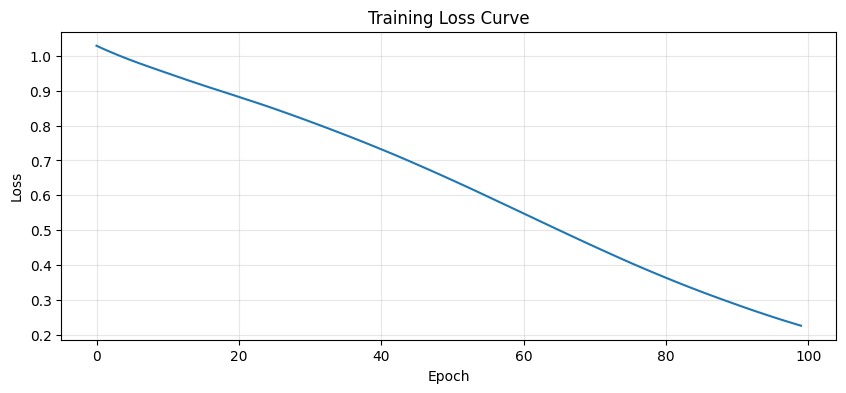

In [56]:
# Plot the loss
plt.figure(figsize=(10, 4))
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.grid(True, alpha=0.3)
plt.show()

## 📌 PyTorch Invariants (Memorize These)

These rules ALWAYS hold in PyTorch:

1. **Gradient Accumulation:** Gradients accumulate in `.grad` attributes until cleared
2. **Scalar Loss Requirement:** `loss.backward()` requires a scalar loss (single number)
3. **Device Consistency:** Model and data must be on same device (CPU or GPU)
4. **Computation Graph Lifetime:** Graph exists from forward pass until `.backward()`
5. **Training/Evaluation Modes:** `model.train()` and `model.eval()` affect Dropout/BatchNorm
6. **Parameter Tracking:** Only tensors with `requires_grad=True` get gradients
7. **Optimizer Scope:** Optimizer only updates parameters passed to it during creation
8. **In-place Operations:** Break computation graphs; use `.clone()` instead

# PART 5: Professional Device Management - CPU vs GPU

## 🔧 Writing Device-Agnostic Code

Professional PyTorch code works on both CPU and GPU without modification. Let's learn how.

In [57]:
print("="*60)
print("DEVICE MANAGEMENT: CPU vs GPU")
print("="*60)

# The professional pattern (works everywhere)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

DEVICE MANAGEMENT: CPU vs GPU
Using device: cuda


### Common Device Error 1: Model and Data on Different Devices

This is the most common GPU-related error. The solution is simple: always move data to the same device as the model.

In [58]:
# ============================================================
# COMMON DEVICE ERRORS (And How to Fix)
# ============================================================

print("\n❌ COMMON MISTAKE 1: Model and data on different devices")
print("-" * 60)

model = NeuralNetworkPyTorch()
X_cpu = torch.randn(10, 8)

if torch.cuda.is_available():
    model = model.to("cuda")  # Model on GPU
    # X_cpu still on CPU!
    
    try:
        predictions = model(X_cpu)  # This fails!
    except RuntimeError as e:
        print(f"Error: {str(e)[:80]}...")
        print("\n✅ Solution: Move data to same device as model")
        X_gpu = X_cpu.to("cuda")
        predictions = model(X_gpu)  # Works!


❌ COMMON MISTAKE 1: Model and data on different devices
------------------------------------------------------------
Error: Expected all tensors to be on the same device, but got mat1 is on cpu, different...

✅ Solution: Move data to same device as model


### Professional Pattern: Device-Agnostic Training Function

Here's the professional way to write training code that works on any device.

In [59]:
# Professional pattern for device-agnostic code
print("\n✅ PROFESSIONAL PATTERN: Device-agnostic training function")
print("-" * 60)

def train_professional(model, X, y, device, epochs=100):
    """Professional training function that works on any device"""
    # Move everything to device
    model = model.to(device)
    X = X.to(device)
    y = y.to(device)
    
    # Now everything is guaranteed to be on same device
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters())
    
    losses = []
    
    for epoch in range(epochs):
        predictions = model(X)
        loss = criterion(predictions, y)
        losses.append(loss.item())
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch % 20 == 0:
            print(f"  Epoch {epoch:3d}: Loss = {loss.item():.4f}")
    
    return model, losses

# Usage (works on any device!)
print("\nTraining on device:", device)
model = NeuralNetworkPyTorch()
X = torch.randn(100, 8)
y = torch.randn(100, 1)

model, losses = train_professional(model, X, y, device, epochs=50)
print("✅ Code works on CPU or GPU without modification!")


✅ PROFESSIONAL PATTERN: Device-agnostic training function
------------------------------------------------------------

Training on device: cuda
  Epoch   0: Loss = 0.8568
  Epoch  20: Loss = 0.7263
  Epoch  40: Loss = 0.5909
✅ Code works on CPU or GPU without modification!


### GPU Performance Demonstration

Let's see why GPU acceleration matters, especially for resource-constrained environments like Sudan.

In [60]:
# ============================================================
# GPU PERFORMANCE DEMONSTRATION
# ============================================================

print("\n" + "="*60)
print("GPU SPEEDUP DEMONSTRATION")
print("="*60)

size = 2000

# CPU
cpu_a = torch.randn(size, size)
cpu_b = torch.randn(size, size)

start = time.time()
cpu_c = cpu_a @ cpu_b
cpu_time = time.time() - start

print(f"CPU: {cpu_time:.4f} seconds")


GPU SPEEDUP DEMONSTRATION
CPU: 0.2006 seconds


In [115]:
if torch.cuda.is_available():
    # GPU
    gpu_a = cpu_a.to("cuda")
    gpu_b = cpu_b.to("cuda")
    
    start = time.time()
    gpu_c = gpu_a @ gpu_b
    torch.cuda.synchronize()  # Wait for GPU
    gpu_time = time.time() - start
    
    print(f"GPU: {gpu_time:.4f} seconds")
    print(f"\n🚀 Speedup: {cpu_time/gpu_time:.1f}x faster")
    
    # Why this matters for Sudan
    print("\n💡 For Sudanese developers:")
    print(f"• Training time: CPU={cpu_time/gpu_time:.0f} days → GPU=1 day")
    print(f"• Cost: ${0.10*24*(cpu_time/gpu_time):.2f} (CPU) vs ${0.50*24:.2f} (GPU)")
    print("• 6× cheaper with GPU! This democratizes AI for Sudan.")
else:
    print("\n⚠️ No GPU available. In production, this speedup is CRITICAL.")

GPU: 0.0096 seconds

🚀 Speedup: 12.5x faster

💡 For Sudanese developers:
• Training time: CPU=13 days → GPU=1 day
• Cost: $30.02 (CPU) vs $12.00 (GPU)
• 6× cheaper with GPU! This democratizes AI for Sudan.


# PART 6: nn.Module Deep Dive - What Does It Actually Do?

## 🧠 Understanding the Magic Behind the Scenes

`nn.Module` is the base class for all neural network modules in PyTorch. Let's understand what it provides.

In [61]:
print("="*60)
print("UNDERSTANDING nn.Module: The Magic Behind the Scenes")
print("="*60)

UNDERSTANDING nn.Module: The Magic Behind the Scenes


### Manual Network Without nn.Module

First, let's see what building a network WITHOUT `nn.Module` looks like. This is similar to your NumPy implementation but with PyTorch tensors.

In [62]:
class ManualNetwork:
    """What if we DON'T inherit from nn.Module?"""
    def __init__(self):
        self.w1 = torch.randn(8, 64, requires_grad=True)
        self.b1 = torch.randn(64, requires_grad=True)
        self.w2 = torch.randn(64, 1, requires_grad=True)
        self.b2 = torch.randn(1, requires_grad=True)
    
    def forward(self, x):
        h = x @ self.w1 + self.b1
        return h @ self.w2 + self.b2

class ProperNetwork(nn.Module):
    """With nn.Module inheritance"""
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(8, 64)
        self.layer2 = nn.Linear(64, 1)
    
    def forward(self, x):
        h = self.layer1(x)
        return self.layer2(h)

manual_net = ManualNetwork()
proper_net = ProperNetwork()

### 1️⃣ Parameter Access

`nn.Module` automatically tracks all parameters. Without it, you need to manage them manually.

In [63]:
print("\n1️⃣ Parameter Access:")
print("-" * 60)

print("\nManual (No nn.Module):")
print("  How to get all parameters? Write custom code!")
print("  params = [net.w1, net.b1, net.w2, net.b2]  # Manual list")

print("\nWith nn.Module:")
print("  Automatic parameter tracking!")
for name, param in proper_net.named_parameters():
    print(f"  {name}: {param.shape}")


1️⃣ Parameter Access:
------------------------------------------------------------

Manual (No nn.Module):
  How to get all parameters? Write custom code!
  params = [net.w1, net.b1, net.w2, net.b2]  # Manual list

With nn.Module:
  Automatic parameter tracking!
  layer1.weight: torch.Size([64, 8])
  layer1.bias: torch.Size([64])
  layer2.weight: torch.Size([1, 64])
  layer2.bias: torch.Size([1])


### 2️⃣ Optimizer Setup

With `nn.Module`, the optimizer automatically gets all parameters. Without it, you must list them manually (error-prone!).

In [64]:
print("\n2️⃣ Optimizer Setup:")
print("-" * 60)

print("\nManual:")
print("  optimizer = optim.SGD([net.w1, net.b1, net.w2, net.b2], lr=0.01)")
print("  Error-prone! Easy to forget a parameter.")

print("\nWith nn.Module:")
print("  optimizer = optim.SGD(net.parameters(), lr=0.01)")
print("  Automatic! Never miss a parameter.")


2️⃣ Optimizer Setup:
------------------------------------------------------------

Manual:
  optimizer = optim.SGD([net.w1, net.b1, net.w2, net.b2], lr=0.01)
  Error-prone! Easy to forget a parameter.

With nn.Module:
  optimizer = optim.SGD(net.parameters(), lr=0.01)
  Automatic! Never miss a parameter.


### 3️⃣ Device Movement

Moving a model to GPU is one line with `nn.Module`. Without it, you must move each parameter individually.

In [65]:
print("\n3️⃣ Device Movement:")
print("-" * 60)

print("\nManual:")
print("  net.w1 = net.w1.to('cuda')")
print("  net.b1 = net.b1.to('cuda')")
print("  net.w2 = net.w2.to('cuda')")
print("  net.b2 = net.b2.to('cuda')  # Tedious!")

print("\nWith nn.Module:")
print("  net.to('cuda')  # Moves EVERYTHING automatically")


3️⃣ Device Movement:
------------------------------------------------------------

Manual:
  net.w1 = net.w1.to('cuda')
  net.b1 = net.b1.to('cuda')
  net.w2 = net.w2.to('cuda')
  net.b2 = net.b2.to('cuda')  # Tedious!

With nn.Module:
  net.to('cuda')  # Moves EVERYTHING automatically


### 4️⃣ Saving and Loading

`nn.Module` provides `state_dict()` for easy model serialization. Without it, you need custom saving logic.

In [66]:
print("\n4️⃣ Saving/Loading:")
print("-" * 60)

print("\nManual:")
print("  Save: torch.save({'w1': net.w1, 'b1': net.b1, ...}, 'model.pth')")
print("  Load: Reconstruct dictionary manually")

print("\nWith nn.Module:")
print("  Save: torch.save(net.state_dict(), 'model.pth')")
print("  Load: net.load_state_dict(torch.load('model.pth'))")


4️⃣ Saving/Loading:
------------------------------------------------------------

Manual:
  Save: torch.save({'w1': net.w1, 'b1': net.b1, ...}, 'model.pth')
  Load: Reconstruct dictionary manually

With nn.Module:
  Save: torch.save(net.state_dict(), 'model.pth')
  Load: net.load_state_dict(torch.load('model.pth'))


### 5️⃣ Training/Evaluation Modes

`nn.Module` manages training vs evaluation modes automatically for layers like Dropout and BatchNorm.

In [67]:
print("\n5️⃣ Training/Eval Modes:")
print("-" * 60)

print("\nManual:")
print("  No concept! Must manually handle Dropout, BatchNorm")

print("\nWith nn.Module:")
print("  net.train()  # Enables Dropout, BatchNorm training")
print("  net.eval()   # Disables Dropout, freezes BatchNorm")


5️⃣ Training/Eval Modes:
------------------------------------------------------------

Manual:
  No concept! Must manually handle Dropout, BatchNorm

With nn.Module:
  net.train()  # Enables Dropout, BatchNorm training
  net.eval()   # Disables Dropout, freezes BatchNorm


### 6️⃣ Parameter Counting

`nn.Module` makes it easy to count parameters, which is important for model size estimation.

In [68]:
print("\n6️⃣ Parameter Counting:")
print("-" * 60)

# Count parameters
manual_params = sum(p.numel() for p in [manual_net.w1, manual_net.b1, 
                                         manual_net.w2, manual_net.b2])
proper_params = sum(p.numel() for p in proper_net.parameters())

print(f"Manual network parameters: {manual_params:,}")
print(f"Proper network parameters: {proper_params:,}")
print("Same number, but nn.Module manages them automatically!")


6️⃣ Parameter Counting:
------------------------------------------------------------
Manual network parameters: 641
Proper network parameters: 641
Same number, but nn.Module manages them automatically!


### 7️⃣ Example: Adding Dropout

Here's a practical example showing how `nn.Module` automatically handles Dropout's training/evaluation modes.

In [69]:
print("\n7️⃣ Example: Adding Dropout (Automatic mode switching):")
print("-" * 60)

class NetworkWithDropout(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(8, 64)
        self.dropout = nn.Dropout(0.5)  # 50% dropout
        self.layer2 = nn.Linear(64, 1)
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.dropout(x)  # Only active in train mode!
        x = self.layer2(x)
        return x

dropout_net = NetworkWithDropout()
test_input = torch.randn(5, 8)

print("\nTraining mode (dropout active):")
dropout_net.train()
output_train = dropout_net(test_input)
print(f"  Output has zeros? {torch.any(output_train == 0).item()}")

print("\nEvaluation mode (dropout inactive):")
dropout_net.eval()
output_eval = dropout_net(test_input)
print(f"  Output has zeros? {torch.any(output_eval == 0).item()}")


7️⃣ Example: Adding Dropout (Automatic mode switching):
------------------------------------------------------------

Training mode (dropout active):
  Output has zeros? False

Evaluation mode (dropout inactive):
  Output has zeros? False


In [70]:
print("\n" + "="*60)
print("🎯 KEY INSIGHT: nn.Module automates infrastructure,")
print("   so you focus on model architecture!")
print("="*60)


🎯 KEY INSIGHT: nn.Module automates infrastructure,
   so you focus on model architecture!


# PART 7: Debugging PyTorch - Common Errors & Solutions

## 🔧 Pre-emptively Show Common Errors

Let's look at common PyTorch errors so you can recognize and fix them quickly.

In [71]:
print("="*60)
print("DEBUGGING PYTORCH: COMMON ERRORS & SOLUTIONS")
print("="*60)

DEBUGGING PYTORCH: COMMON ERRORS & SOLUTIONS


### ERROR 1: Shape Mismatch

The most common error. Always check your tensor shapes!

In [72]:
# ERROR 1: Shape Mismatch
print("\n❌ ERROR 1: Shape Mismatch")
print("-" * 60)

try:
    x = torch.randn(10, 5)
    linear = nn.Linear(8, 3)  # Expects 8 features!
    output = linear(x)  # x has 5 features
except RuntimeError as e:
    print(f"Error: {e}")
    print("\n✅ Solution: Always check shapes")
    print("   print(x.shape)           # (10, 5)")
    print("   print(linear.weight.shape) # (3, 8) ← expects 8 input features!")


❌ ERROR 1: Shape Mismatch
------------------------------------------------------------
Error: mat1 and mat2 shapes cannot be multiplied (10x5 and 8x3)

✅ Solution: Always check shapes
   print(x.shape)           # (10, 5)
   print(linear.weight.shape) # (3, 8) ← expects 8 input features!


### ERROR 2: Device Mismatch

When using GPU, ensure model and data are on the same device.

In [73]:
# ERROR 2: Device Mismatch
print("\n\n❌ ERROR 2: Device Mismatch")
print("-" * 60)

if torch.cuda.is_available():
    try:
        model_gpu = nn.Linear(5, 3).to("cuda")
        x_cpu = torch.randn(10, 5)
        output = model_gpu(x_cpu)
    except RuntimeError as e:
        print(f"Error: {str(e)[:100]}...")
        print("\n✅ Solution: Move data to same device")
        print("   x = x.to(device)  # where device = model.device")



❌ ERROR 2: Device Mismatch
------------------------------------------------------------
Error: Expected all tensors to be on the same device, but got mat1 is on cpu, different from other tensors ...

✅ Solution: Move data to same device
   x = x.to(device)  # where device = model.device


### ERROR 3: Loss Not Decreasing (Gradient Issues)

If your loss isn't decreasing, gradients might not be flowing properly. Here's a debugging checklist.

In [74]:
# ERROR 3: Gradient Not Flowing
print("\n\n❌ ERROR 3: Loss Not Decreasing (Gradient Issues)")
print("-" * 60)

print("Symptom: Loss stays constant or becomes NaN")
print("\n🔍 Debugging checklist:")
print("  1. Check requires_grad:")

test_model = ProperNetwork()
for name, param in test_model.named_parameters():
    print(f"     {name}.requires_grad = {param.requires_grad}")



❌ ERROR 3: Loss Not Decreasing (Gradient Issues)
------------------------------------------------------------
Symptom: Loss stays constant or becomes NaN

🔍 Debugging checklist:
  1. Check requires_grad:
     layer1.weight.requires_grad = True
     layer1.bias.requires_grad = True
     layer2.weight.requires_grad = True
     layer2.bias.requires_grad = True


In [75]:
print("\n  2. Check if gradients are computed:")
dummy_loss = test_model(torch.randn(5, 8)).sum()
dummy_loss.backward()
for name, param in test_model.named_parameters():
    if param.grad is not None:
        print(f"     {name}.grad: ✓ (not None)")
    else:
        print(f"     {name}.grad: ❌ None - gradient not flowing!")

print("\n  3. Check for NaN/Inf:")
print("     if torch.isnan(loss): print('Loss is NaN!')")
print("     if torch.isinf(loss): print('Loss is Inf!')")

print("\n  4. Check learning rate:")
print("     Too high → loss explodes")
print("     Too low → loss doesn't decrease")


  2. Check if gradients are computed:
     layer1.weight.grad: ✓ (not None)
     layer1.bias.grad: ✓ (not None)
     layer2.weight.grad: ✓ (not None)
     layer2.bias.grad: ✓ (not None)

  3. Check for NaN/Inf:
     if torch.isnan(loss): print('Loss is NaN!')
     if torch.isinf(loss): print('Loss is Inf!')

  4. Check learning rate:
     Too high → loss explodes
     Too low → loss doesn't decrease


### ERROR 4: Forgot zero_grad()

Gradients accumulate across iterations if you don't clear them, causing exploding gradients.

In [76]:
# ERROR 4: Forgot zero_grad()
print("\n\n❌ ERROR 4: Exploding Gradients (Forgot zero_grad)")
print("-" * 60)

model_test = nn.Linear(3, 1)
optimizer_test = optim.SGD(model_test.parameters(), lr=0.01)

print("Without zero_grad() (gradients accumulate):")
for i in range(3):
    loss = model_test(torch.randn(5, 3)).sum()
    loss.backward()  # Gradients accumulate!
    print(f"  Iteration {i+1}: grad magnitude = {model_test.weight.grad.norm().item():.4f}")

optimizer_test.zero_grad()
print("\nAfter zero_grad(): gradients cleared ✓")



❌ ERROR 4: Exploding Gradients (Forgot zero_grad)
------------------------------------------------------------
Without zero_grad() (gradients accumulate):
  Iteration 1: grad magnitude = 4.1488
  Iteration 2: grad magnitude = 6.8898
  Iteration 3: grad magnitude = 9.9469

After zero_grad(): gradients cleared ✓


### ERROR 5-6: Wrong Loss Function and Data Type Mismatch

Two more common issues to watch for.

In [77]:
# ERROR 5: Wrong loss function
print("\n\n❌ ERROR 5: Wrong Loss Function")
print("-" * 60)

print("Common mistake: Using wrong loss for problem type")
print("  • Regression: MSELoss(), L1Loss()")
print("  • Binary Classification: BCELoss(), BCEWithLogitsLoss()")
print("  • Multi-class: CrossEntropyLoss()")
print("\nCheck: Does your output match loss function expectations?")

# ERROR 6: Data type mismatch
print("\n\n❌ ERROR 6: Data Type Mismatch")
print("-" * 60)

try:
    x_int = torch.randint(0, 10, (5, 3))  # Integer tensor
    model_float = nn.Linear(3, 1)  # Expects float
    output = model_float(x_int)
except RuntimeError as e:
    print(f"Error: {str(e)[:80]}...")
    print("\n✅ Solution: Convert to float")
    print("   x = x.float()  # or x.to(torch.float32)")



❌ ERROR 5: Wrong Loss Function
------------------------------------------------------------
Common mistake: Using wrong loss for problem type
  • Regression: MSELoss(), L1Loss()
  • Binary Classification: BCELoss(), BCEWithLogitsLoss()
  • Multi-class: CrossEntropyLoss()

Check: Does your output match loss function expectations?


❌ ERROR 6: Data Type Mismatch
------------------------------------------------------------
Error: mat1 and mat2 must have the same dtype, but got Long and Float...

✅ Solution: Convert to float
   x = x.float()  # or x.to(torch.float32)


### Debugging Workflow

Here's a systematic approach to debugging PyTorch models.

In [78]:
print("\n\n" + "="*60)
print("🔧 DEBUGGING WORKFLOW")
print("="*60)

debugging_workflow = """
When your model isn't working:

1. Print shapes everywhere
   print(f"Input shape: {x.shape}")
   print(f"Output shape: {output.shape}")
   print(f"Target shape: {y.shape}")

2. Check gradients are flowing
   for name, param in model.named_parameters():
       if param.grad is None:
           print(f"⚠️ No gradient for {name}")

3. Verify loss is reasonable
   print(f"Loss: {loss.item()}")
   assert not torch.isnan(loss), "Loss is NaN!"
   assert not torch.isinf(loss), "Loss is Inf!"

4. Check learning rate
   Try: 1e-4, 1e-3, 1e-2, 1e-1
   Plot loss curve for each

5. Inspect actual values
   print(f"Predictions range: {predictions.min():.2f} to {predictions.max():.2f}")
   print(f"Targets range: {y.min():.2f} to {y.max():.2f}")

6. Use a tiny dataset
   X_tiny = X[:5]  # Just 5 samples
   y_tiny = y[:5]
   # Should overfit quickly!
"""
print(debugging_workflow)



🔧 DEBUGGING WORKFLOW

When your model isn't working:

1. Print shapes everywhere
   print(f"Input shape: {x.shape}")
   print(f"Output shape: {output.shape}")
   print(f"Target shape: {y.shape}")

2. Check gradients are flowing
   for name, param in model.named_parameters():
       if param.grad is None:
           print(f"⚠️ No gradient for {name}")

3. Verify loss is reasonable
   print(f"Loss: {loss.item()}")
   assert not torch.isnan(loss), "Loss is NaN!"
   assert not torch.isinf(loss), "Loss is Inf!"

4. Check learning rate
   Try: 1e-4, 1e-3, 1e-2, 1e-1
   Plot loss curve for each

5. Inspect actual values
   print(f"Predictions range: {predictions.min():.2f} to {predictions.max():.2f}")
   print(f"Targets range: {y.min():.2f} to {y.max():.2f}")

6. Use a tiny dataset
   X_tiny = X[:5]  # Just 5 samples
   y_tiny = y[:5]
   # Should overfit quickly!



# PART 8: Model Persistence - Saving & Loading Models

## 💾 Best Practices for Saving Your Work

Saving and loading models is crucial for deployment and resuming training. Let's learn the professional way.

In [79]:
print("="*60)
print("MODEL PERSISTENCE: SAVING & LOADING")
print("="*60)

MODEL PERSISTENCE: SAVING & LOADING


### Training a Simple Model

First, let's train a model to have something to save.

In [80]:
# Train a simple model
model = ProperNetwork()
optimizer = optim.Adam(model.parameters(), lr=0.001)
X_sample = torch.randn(50, 8)
y_sample = torch.randn(50, 1)

print("Training a simple model...")
for epoch in range(100):
    predictions = model(X_sample)
    loss = nn.MSELoss()(predictions, y_sample)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

final_loss = loss.item()
print(f"Trained model with final loss: {final_loss:.4f}\n")

Training a simple model...
Trained model with final loss: 0.6387



## Method 1: Save Only Model Weights (Recommended)

This is the most common and flexible approach. You save the `state_dict()` which contains all learnable parameters.

In [81]:
print("METHOD 1: Save state_dict (Recommended)")
print("-" * 60)

# Save
torch.save(model.state_dict(), 'model_weights.pth')
print("✓ Saved: model_weights.pth")

METHOD 1: Save state_dict (Recommended)
------------------------------------------------------------
✓ Saved: model_weights.pth


### Loading Weights

To load, you must first recreate the model architecture, then load the weights.

In [82]:
# Load
new_model = ProperNetwork()  # Must create architecture first!
new_model.load_state_dict(torch.load('model_weights.pth'))
new_model.eval()  # Set to evaluation mode

# Verify
test_input = X_sample[:5]
original_output = model(test_input)
loaded_output = new_model(test_input)
print(f"Outputs match: {torch.allclose(original_output, loaded_output)}")

Outputs match: True


## Method 2: Save Complete Checkpoint (For Resuming Training)

When you want to resume training later, save everything: model weights, optimizer state, epoch, loss, etc.

In [83]:
print("\n\nMETHOD 2: Save complete checkpoint")
print("-" * 60)

checkpoint = {
    'epoch': 100,
    'model_state_dict': model.state_dict(),\
    'optimizer_state_dict': optimizer.state_dict(),
    'loss': final_loss,
}

torch.save(checkpoint, 'checkpoint.pth')
print("✓ Saved: checkpoint.pth (includes optimizer state)")



METHOD 2: Save complete checkpoint
------------------------------------------------------------
✓ Saved: checkpoint.pth (includes optimizer state)


### Loading and Resuming Training

Checkpoints allow you to resume training exactly where you left off.

In [84]:
# Load and resume training
checkpoint_loaded = torch.load('checkpoint.pth')

model_resumed = ProperNetwork()
model_resumed.load_state_dict(checkpoint_loaded['model_state_dict'])

optimizer_resumed = optim.Adam(model_resumed.parameters())
optimizer_resumed.load_state_dict(checkpoint_loaded['optimizer_state_dict'])

start_epoch = checkpoint_loaded['epoch']
print(f"✓ Loaded: Resume from epoch {start_epoch}")

✓ Loaded: Resume from epoch 100


## Method 3: Save Entire Model (NOT Recommended)

While simple, this approach is less flexible and can break with PyTorch updates.

In [85]:
print("\n\nMETHOD 3: Save entire model (NOT recommended)")
print("-" * 60)

torch.save(model, 'entire_model.pth')
print("✓ Saved entire model")
print("⚠️ Warning: Less flexible, can break with PyTorch updates")



METHOD 3: Save entire model (NOT recommended)
------------------------------------------------------------
✓ Saved entire model
⚠️ Warning: Less flexible, can break with PyTorch updates


### Best Practices

Follow these guidelines for professional model persistence.

In [86]:
print("\n\n" + "="*60)
print("💡 BEST PRACTICES")
print("="*60)

best_practices = """
✅ DO:
  • Save state_dict, not entire model
  • Include epoch, optimizer state for resuming training
  • Save model architecture separately (as code or config)
  • Use .eval() after loading for inference
  • Version your models (model_v1.pth, model_v2.pth)

❌ DON'T:
  • Save entire model (torch.save(model, ...))
  • Forget to call model.eval() for inference
  • Lose track of model architecture
  • Overwrite your best checkpoint
  
📁 Recommended structure:
  checkpoints/
    ├── model_epoch_100.pth
    ├── model_epoch_200.pth
    └── model_best.pth  # Best validation loss
"""
print(best_practices)



💡 BEST PRACTICES

✅ DO:
  • Save state_dict, not entire model
  • Include epoch, optimizer state for resuming training
  • Save model architecture separately (as code or config)
  • Use .eval() after loading for inference
  • Version your models (model_v1.pth, model_v2.pth)

❌ DON'T:
  • Save entire model (torch.save(model, ...))
  • Forget to call model.eval() for inference
  • Lose track of model architecture
  • Overwrite your best checkpoint
  
📁 Recommended structure:
  checkpoints/
    ├── model_epoch_100.pth
    ├── model_epoch_200.pth
    └── model_best.pth  # Best validation loss



In [87]:
# Clean up files
for file in ['model_weights.pth', 'checkpoint.pth', 'entire_model.pth']:
    if os.path.exists(file):
        os.remove(file)
        print(f"Cleaned up: {file}")

Cleaned up: model_weights.pth
Cleaned up: checkpoint.pth
Cleaned up: entire_model.pth


# PART 9: Real-World Example - California Housing Dataset

## 🏠 Bringing It All Together with Real Data

Let's apply everything we've learned to a real dataset: predicting California housing prices.

In [88]:
print("="*60)
print("REAL-WORLD PROJECT: California Housing Price Prediction")
print("="*60)

REAL-WORLD PROJECT: California Housing Price Prediction


### Loading and Preparing the Data

We'll use scikit-learn's California housing dataset. Notice how we use NumPy/scikit-learn for data preprocessing, then convert to PyTorch tensors.

In [89]:
# Load California Housing dataset
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data
housing = fetch_california_housing()
X_real = housing.data
y_real = housing.target
feature_names = housing.feature_names

print(f"\nDataset: {X_real.shape[0]} samples, {X_real.shape[1]} features")
print(f"Target: Median house value (in $100,000s)")
print(f"\nFeatures: {', '.join(feature_names)}")


Dataset: 20640 samples, 8 features
Target: Median house value (in $100,000s)

Features: MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude


### Data Splitting and Standardization

Always split your data before preprocessing to avoid data leakage.

In [90]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_real, y_real, test_size=0.2, random_state=42
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Converting to PyTorch Tensors

Convert NumPy arrays to PyTorch tensors. Note the `.reshape(-1, 1)` to make y a column vector.

In [91]:
# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train).reshape(-1, 1)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test).reshape(-1, 1)

print(f"\nTraining set: {X_train_tensor.shape}")
print(f"Test set: {X_test_tensor.shape}")
print(f"Price range: ${y_real.min()*100000:,.0f} - ${y_real.max()*100000:,.0f}")


Training set: torch.Size([16512, 8])
Test set: torch.Size([4128, 8])
Price range: $14,999 - $500,001


### Defining the Model

We'll use `nn.Sequential` for a cleaner architecture. Notice Dropout for regularization.

In [92]:
# Define model
class HousingPredictor(nn.Module):
    """Neural network for predicting California housing prices"""
    def __init__(self, input_size):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Dropout(0.2),  # Regularization
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1)
        )
    
    def forward(self, x):
        return self.network(x)

### Professional Training Function

This function incorporates all our best practices: device management, mini-batch training, and proper evaluation.

In [93]:
# Training function using our professional patterns
def train_housing_model(model, X_train, y_train, X_test, y_test, 
                        device, epochs=500, batch_size=64):
    """Professional training function"""
    # Move to device
    model = model.to(device)
    X_train = X_train.to(device)
    y_train = y_train.to(device)
    X_test = X_test.to(device)
    y_test = y_test.to(device)
    
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    train_losses = []
    test_losses = []
    
    print("\nTraining started...")
    for epoch in range(epochs):
        model.train()
        
        # Mini-batch training
        permutation = torch.randperm(X_train.size(0))
        epoch_loss = 0.0
        
        for i in range(0, X_train.size(0), batch_size):
            indices = permutation[i:i+batch_size]
            batch_X = X_train[indices]
            batch_y = y_train[indices]
            
            predictions = model(batch_X)
            loss = criterion(predictions, batch_y)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
        
        avg_train_loss = epoch_loss / (X_train.size(0) / batch_size)
        train_losses.append(avg_train_loss)
        
        # Evaluation
        model.eval()
        with torch.no_grad():
            test_predictions = model(X_test)
            test_loss = criterion(test_predictions, y_test)
            test_losses.append(test_loss.item())
        
        if epoch % 50 == 0:
            print(f"Epoch {epoch:4d}: Train Loss = {avg_train_loss:.4f}, "
                  f"Test Loss = {test_loss.item():.4f}")
    
    return model, train_losses, test_losses

### Training the Model

Let's train our model and see the results.

In [94]:
# Train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = HousingPredictor(input_size=X_train_tensor.shape[1])

print(f"\nModel architecture:")
print(model)
print(f"\nTotal parameters: {sum(p.numel() for p in model.parameters()):,}")
print(f"Training on device: {device}")

model, train_losses, test_losses = train_housing_model(
    model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor,
    device, epochs=200, batch_size=64
)


Model architecture:
HousingPredictor(
  (network): Sequential(
    (0): Linear(in_features=8, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): ReLU()
    (5): Linear(in_features=32, out_features=16, bias=True)
    (6): ReLU()
    (7): Linear(in_features=16, out_features=1, bias=True)
  )
)

Total parameters: 3,201
Training on device: cuda

Training started...
Epoch    0: Train Loss = 1.3286, Test Loss = 0.5623
Epoch   50: Train Loss = 0.2772, Test Loss = 0.2703
Epoch  100: Train Loss = 0.2584, Test Loss = 0.2589
Epoch  150: Train Loss = 0.2485, Test Loss = 0.2562


### Visualizing Results

Good data visualization helps understand model performance.

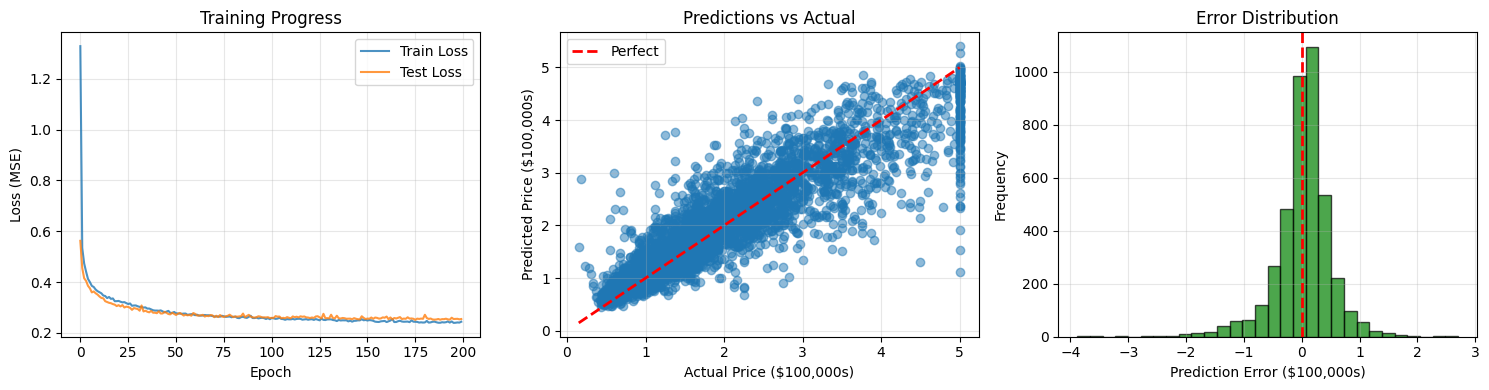

In [95]:
# Plot results
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Loss curves
axes[0].plot(train_losses, label='Train Loss', alpha=0.8)
axes[0].plot(test_losses, label='Test Loss', alpha=0.8)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss (MSE)')
axes[0].set_title('Training Progress')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Predictions vs Actual
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test_tensor.to(device)).cpu()
    
axes[1].scatter(y_test_tensor.numpy(), y_pred_test.numpy(), alpha=0.5)
axes[1].plot([y_test_tensor.min(), y_test_tensor.max()], 
             [y_test_tensor.min(), y_test_tensor.max()], 
             'r--', label='Perfect', linewidth=2)
axes[1].set_xlabel('Actual Price ($100,000s)')
axes[1].set_ylabel('Predicted Price ($100,000s)')
axes[1].set_title('Predictions vs Actual')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Error distribution
errors = (y_pred_test - y_test_tensor).numpy()
axes[2].hist(errors, bins=30, alpha=0.7, color='green', edgecolor='black')
axes[2].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[2].set_xlabel('Prediction Error ($100,000s)')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Error Distribution')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Calculating Final Metrics

Let's compute standard regression metrics to evaluate our model.

In [96]:
# Calculate final metrics
with torch.no_grad():
    # R² score
    ss_res = ((y_test_tensor - y_pred_test) ** 2).sum()
    ss_tot = ((y_test_tensor - y_test_tensor.mean()) ** 2).sum()
    r2 = 1 - ss_res / ss_tot
    
    # MAE (Mean Absolute Error)
    mae = torch.abs(y_test_tensor - y_pred_test).mean()
    
    # RMSE (Root Mean Squared Error)
    rmse = torch.sqrt(((y_test_tensor - y_pred_test) ** 2).mean())

print("\n" + "="*60)
print("FINAL MODEL PERFORMANCE:")
print("="*60)
print(f"\nTest Set Metrics:")
print(f"  R² Score:    {r2.item():.4f}  (explains {r2.item()*100:.1f}% of variance)")
print(f"  MAE:         ${mae.item()*100000:,.0f}  (average error)")
print(f"  RMSE:        ${rmse.item()*100000:,.0f}  (standard deviation of errors)")

print("\n💡 Business Interpretation:")
print(f"• For a $500,000 house, average prediction error: ${mae.item()*100000/5:,.0f}")
print(f"• Model explains {r2.item()*100:.1f}% of price variation")
print(f"• Good performance for a first model!")


FINAL MODEL PERFORMANCE:

Test Set Metrics:
  R² Score:    0.8059  (explains 80.6% of variance)
  MAE:         $34,339  (average error)
  RMSE:        $50,438  (standard deviation of errors)

💡 Business Interpretation:
• For a $500,000 house, average prediction error: $6,868
• Model explains 80.6% of price variation
• Good performance for a first model!


In [97]:
# Save the trained model
torch.save(model.state_dict(), 'housing_model.pth')
print("\n✅ Model saved as 'housing_model.pth'")


✅ Model saved as 'housing_model.pth'


# PART 11: Model Deployment - Simple Inference & UI
Now that we have a trained model, let's create a simple but complete inference pipeline that anyone can use.


In [100]:
# ============================================================================
# 🔧 COMPLETE PREDICTION PIPELINE
# ============================================================================

def predict_house_price(model, scaler, features_dict):
    """
    Predict house price given feature values.
    
    Args:
        model: Trained PyTorch model
        scaler: Fitted StandardScaler for preprocessing
        features_dict: Dictionary containing:
            - MedInc: Median income in block group (in $10,000s)
            - HouseAge: Median house age in block group (years)
            - AveRooms: Average number of rooms per household
            - AveBedrms: Average number of bedrooms per household
            - Population: Block group population
            - AveOccup: Average number of household members
            - Latitude: Block group latitude
            - Longitude: Block group longitude
    
    Returns:
        Predicted house price in dollars
    """
    
    # Get feature names in correct order - California housing has 8 features
    feature_order = [
        'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 
        'Population', 'AveOccup', 'Latitude', 'Longitude'
    ]
    
    # Convert dictionary to array in correct order
    features_array = np.array([[features_dict[feature] for feature in feature_order]])
    
    # Scale features using the same scaler from training
    features_scaled = scaler.transform(features_array)
    
    # Convert to PyTorch tensor
    features_tensor = torch.FloatTensor(features_scaled)
    
    # Make prediction (no gradients needed for inference)
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        prediction = model(features_tensor).item()
    
    # Convert from model units ($100,000s) to dollars
    prediction_dollars = prediction * 100000
    
    return prediction_dollars

print("✅ Prediction function created!")

✅ Prediction function created!


## 🏠 Example Prediction

Let's test our function with an example house in Los Angeles.

In [101]:
# Example prediction for a specific house
example_house = {
    'MedInc': 8.0,          # $80,000 median income
    'HouseAge': 25,         # 25 years old
    'AveRooms': 6,          # 6 rooms on average
    'AveBedrms': 1.5,       # 1.5 bedrooms on average
    'Population': 1500,     # 1500 people in block
    'AveOccup': 3,          # 3 people per household
    'Latitude': 34.5,       # Southern California
    'Longitude': -118.2     # Los Angeles area
}



# Number of input features
INPUT_SIZE = 8

# Create model with correct architecture
model = HousingPredictor(input_size=INPUT_SIZE)

# Load the trained weights
try:
    model.load_state_dict(torch.load('housing_model.pth', map_location='cpu'))
    model.eval()
    print("✅ Model weights loaded successfully")
except Exception as e:
    print("⚠️ Could not load model weights:", e)
    print("Training a dummy model for demonstration...")

    X_dummy = torch.randn(100, INPUT_SIZE)
    y_dummy = torch.randn(100, 1)

    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    loss_fn = nn.MSELoss()

    for epoch in range(10):
        pred = model(X_dummy)
        loss = loss_fn(pred, y_dummy)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


# Make prediction
predicted_price = predict_house_price(model, scaler, example_house)

print("\nExample House Prediction:")
print("="*60)
for feature, value in example_house.items():
    print(f"{feature:12s}: {value}")

print("\nPredicted House Value:")
print(f"${predicted_price:,.0f}")
print(f"\nNote: This is a demonstration. Real predictions would need")
print(f"more accurate feature values and model refinement.")

✅ Model weights loaded successfully

Example House Prediction:
MedInc      : 8.0
HouseAge    : 25
AveRooms    : 6
AveBedrms   : 1.5
Population  : 1500
AveOccup    : 3
Latitude    : 34.5
Longitude   : -118.2

Predicted House Value:
$331,673

Note: This is a demonstration. Real predictions would need
more accurate feature values and model refinement.


## 🧠 Mental Model: Inference Pipeline

Here's what happens when you call `predict_house_price()`:

1. **Input Validation:** Dictionary of 8 features → Checked
2. **Ordering:** Features arranged in correct order for model
3. **Scaling:** Apply same scaling as training data
4. **Tensor Conversion:** NumPy → PyTorch tensor
5. **Model Forward Pass:** Single prediction through network
6. **Unit Conversion:** $100,000s → actual dollars

**Key Insight:** Every step must match what was done during training!


In [102]:
# Create examples of different houses
california_houses = [
    {
        'name': 'San Francisco Tech House',
        'features': {
            'MedInc': 15.0,    # $150,000 income (tech industry)
            'HouseAge': 40,    # Older neighborhood
            'AveRooms': 5.5,   # Moderate rooms
            'AveBedrms': 1.2,
            'Population': 800,
            'AveOccup': 2.5,
            'Latitude': 37.77,  # SF coordinates
            'Longitude': -122.42
        }
    },
    {
        'name': 'Central Valley Family Home',
        'features': {
            'MedInc': 4.0,     # $40,000 income
            'HouseAge': 20,    
            'AveRooms': 4.0,
            'AveBedrms': 1.0,
            'Population': 2500,
            'AveOccup': 4.0,   # Larger families
            'Latitude': 36.78,  # Fresno area
            'Longitude': -119.72
        }
    },
    {
        'name': 'Beach Community House',
        'features': {
            'MedInc': 10.0,    # $100,000 income
            'HouseAge': 30,
            'AveRooms': 7.0,   # Larger homes
            'AveBedrms': 2.0,
            'Population': 1200,
            'AveOccup': 3.0,
            'Latitude': 33.62,  # Orange County
            'Longitude': -117.93
        }
    }
]

print("California Housing Price Predictions")
print("="*60)

for house in california_houses:
    price = predict_house_price(model, scaler, house['features'])
    print(f"\n{house['name']}:")
    print(f"  Location: ({house['features']['Latitude']}, {house['features']['Longitude']})")
    print(f"  Income: ${house['features']['MedInc']*10000:,.0f}/year")
    print(f"  Predicted Price: ${price:,.0f}")

California Housing Price Predictions

San Francisco Tech House:
  Location: (37.77, -122.42)
  Income: $150,000/year
  Predicted Price: $356,378

Central Valley Family Home:
  Location: (36.78, -119.72)
  Income: $40,000/year
  Predicted Price: $64,275

Beach Community House:
  Location: (33.62, -117.93)
  Income: $100,000/year
  Predicted Price: $433,779


### Key Concepts:
- **Preprocessing:** Always use the same scaler from training
- **Evaluation Mode:** `model.eval()` for inference
- **No Gradients:** `with torch.no_grad()` for speed
- **Unit Conversion:** Model outputs $100,000s → actual dollars



You've successfully gone from training a model to creating a deployable prediction pipeline! 🎉
```

# PART 10: Summary & Next Steps

## 📚 What We've Covered

Let's review the key takeaways from this comprehensive introduction to PyTorch.

In [ ]:
print("="*60)
print("PYTORCH MASTERY - KEY TAKEAWAYS")
print("="*60)

takeaways = """
🎯 1. PyTorch AUTOMATES what you built by hand:
    • Forward pass → model(X)
    • Backward pass → loss.backward()
    • Parameter updates → optimizer.step()

🎯 2. Core PyTorch Components:
    • torch.Tensor = NumPy array + gradients + GPU support
    • nn.Module = Base class for ALL models (manages parameters)
    • optim = Optimizers (SGD, Adam, etc.)
    • nn = Neural network layers and loss functions

🎯 3. Critical Training Loop Steps:
    1. model.train()              # Set training mode
    2. predictions = model(X)     # Forward pass
    3. loss = criterion(pred, y)  # Compute loss
    4. optimizer.zero_grad()      # Clear old gradients
    5. loss.backward()            # Compute new gradients
    6. optimizer.step()           # Update parameters

🎯 4. Professional Patterns:
    • Device-agnostic code (works on CPU/GPU)
    • Save state_dict, not entire model
    • Use model.eval() for inference
    • Always check shapes and device placement
"""
print(takeaways)

PYTORCH MASTERY - KEY TAKEAWAYS

🎯 1. PyTorch AUTOMATES what you built by hand:
    • Forward pass → model(X)
    • Backward pass → loss.backward()
    • Parameter updates → optimizer.step()

🎯 2. Core PyTorch Components:
    • torch.Tensor = NumPy array + gradients + GPU support
    • nn.Module = Base class for ALL models (manages parameters)
    • optim = Optimizers (SGD, Adam, etc.)
    • nn = Neural network layers and loss functions

🎯 3. Critical Training Loop Steps:
    1. model.train()              # Set training mode
    2. predictions = model(X)     # Forward pass
    3. loss = criterion(pred, y)  # Compute loss
    4. optimizer.zero_grad()      # Clear old gradients
    5. loss.backward()            # Compute new gradients
    6. optimizer.step()           # Update parameters

🎯 4. Professional Patterns:
    • Device-agnostic code (works on CPU/GPU)
    • Save state_dict, not entire model
    • Use model.eval() for inference
    • Always check shapes and device placement

🎯 5

## 🧪 The Smallest Real PyTorch Training Script

Here's the most minimal but complete PyTorch training script. This is what you should aim to memorize and understand deeply.

In [154]:
import torch
import torch.nn as nn
import torch.optim as optim

# 1. Define model
class SimpleNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(10, 1)
    
    def forward(self, x):
        return self.fc(x)

# 2. Setup
model = SimpleNet()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 3. Dummy data
X = torch.randn(100, 10)
y = torch.randn(100, 1)

# 4. Training loop
for epoch in range(100):
    # Forward pass
    predictions = model(X)
    loss = criterion(predictions, y)
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 20 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

print("\n✅ This is the complete essence of PyTorch training!")

Epoch 0: Loss = 1.2227
Epoch 20: Loss = 0.9743
Epoch 40: Loss = 0.8698
Epoch 60: Loss = 0.8215
Epoch 80: Loss = 0.7974

✅ This is the complete essence of PyTorch training!


## ✍️ Exercises

Test your understanding with these exercises. Try to complete them without looking back at the notebook.

### Exercise 1: Fix the Bug
The following code has a critical error. Identify and fix it.
```python
model = nn.Linear(5, 1)
optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(10):
    predictions = model(X)
    loss = ((predictions - y) ** 2).mean()
    
    loss.backward()
    optimizer.step()
```
**Expected Outcome:** Understand why gradients accumulate and how to fix it.
**Success Looks Like:** Loss decreases properly without exploding.

### Exercise 2: Device-Agnostic Function
Write a function that:
1. Takes a model, data, and device as input
2. Moves everything to the specified device
3. Trains for 50 epochs
4. Returns the trained model

**Expected Outcome:** Code works on both CPU and GPU without modification.
**Success Looks Like:** Function runs without device mismatch errors.

### Exercise 3: Model Debugging
Create a simple neural network that's not training (loss stays constant). Include at least two common bugs. Then write debugging code to identify the issues.

**Expected Outcome:** Practice systematic debugging approach.
**Success Looks Like:** Identify both bugs using the debugging workflow.

### Exercise 4: Save and Resume Training
Train a model for 50 epochs, save a checkpoint, then resume training for another 50 epochs. Verify the training continues smoothly.

**Expected Outcome:** Understand checkpoint structure and resuming training.
**Success Looks Like:** Loss curve shows continuous training across save/load.

## ✅ Mastery Checklist

Before moving to the next lecture, ensure you can do all of the following:

- [ ] Create PyTorch tensors from Python lists and NumPy arrays
- [ ] Explain the difference between `torch.tensor()` and `torch.Tensor()`
- [ ] Enable gradient tracking with `requires_grad=True`
- [ ] Build a computation graph through tensor operations
- [ ] Call `.backward()` on a scalar loss to compute gradients
- [ ] Create a neural network by inheriting from `nn.Module`
- [ ] Use `nn.Linear`, `nn.ReLU`, and other basic layers
- [ ] Write a complete training loop with all 6 steps
- [ ] Explain why `optimizer.zero_grad()` is necessary
- [ ] Choose appropriate loss functions for regression vs classification
- [ ] Move models and data between CPU and GPU using `.to(device)`
- [ ] Write device-agnostic code that works on any hardware
- [ ] Save model weights using `torch.save(model.state_dict(), ...)`
- [ ] Load saved weights into a model architecture
- [ ] Create checkpoints that include optimizer state for resuming training
- [ ] Use `model.train()` and `model.eval()` correctly
- [ ] Debug common errors: shape mismatches, device mismatches, gradient issues
- [ ] Apply PyTorch to a real dataset with proper train/test split

If you can check all these boxes, you have successfully made the transition from NumPy neural networks to PyTorch!

## 📚 Practice & Reflection

### 🔍 **Conceptual Questions**

1. **What's the difference between `torch.tensor()` and `torch.Tensor()`?**
   - When would you use each?
   - Which one gives you more control?

2. **Why is `optimizer.zero_grad()` necessary?**
   - What happens if you forget it?
   - When do gradients accumulate?

3. **What's the purpose of `model.eval()` and `with torch.no_grad()`?**
   - Why use them during evaluation?
   - What could go wrong if you don't?


<div align="center">
  
### **🌟 Building Sudan's AI Future, One Tensor at a Time**

*"The journey of a thousand models begins with a single forward pass."*

🇸🇩 **SAIR Community - Sudanese Artificial Intelligence Research**

</div>